In [1]:
!pip install pymodis

     |████████████████████████████████| 3.0 MB 4.3 MB/s 
  Created wheel for pymodis: filename=pyModis-2.1.0-py3-none-any.whl size=58363 sha256=67241b9e18b19e5e6b3afbce7cefe1ea7e7c9f2546c690e7f7bde77ffb19c8bc
  Stored in directory: /root/.cache/pip/wheels/c1/a7/ae/87078fdc650d6837032c763ca2d3763f5cd59138313141f2b5
Successfully built pymodis


### Download Raw MODIS Dataset

In [2]:
import os
import glob
from pymodis import downmodis
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

WxPython missing, no GUI enabled


In [5]:
hdfs_path           = 'dataset/hdf_files'
imgs_1km_path       = 'dataset/imgs_1km'
imgs_1km_Day_path   = 'dataset/imgs_1km/Day'
imgs_1km_Night_path = 'dataset/imgs_1km/Night'
imgs_4km_path       = 'dataset/imgs_4km'

os.makedirs(hdfs_path,exist_ok=1)
os.makedirs(imgs_1km_path,exist_ok=1)
os.makedirs(imgs_1km_Day_path,exist_ok=1)
os.makedirs(imgs_1km_Night_path,exist_ok=1)
os.makedirs(imgs_4km_path,exist_ok=1)

# tiles to download
tiles = "h18v04,h19v04"
# starting day
day = "2014-08-14"
# number of day to download
delta = 10

# Initialize downmodis module
modisDown = downmodis.downModis(user="projet3a",password="Projet3AIMT",destinationFolder=hdfs_path, tiles=tiles, today=day, delta=delta)
modisDown.connect()
# Start to download
modisDown.downloadsAllDay()


### Extract image array to npy

In [8]:
hdfs = os.listdir(hdfs_path)

for hdf in hdfs:
  if not hdf.endswith('hdf'): continue

  hdf_path = os.path.join(hdfs_path,hdf)
  print("hdf_path",hdf_path)
  # open dataset Day
  dataset = gdal.Open(hdf_path,gdal.GA_ReadOnly)
  subdataset =  gdal.Open(dataset.GetSubDatasets()[0][0], gdal.GA_ReadOnly)

  cols =subdataset.RasterXSize
  rows = subdataset.RasterYSize
  projection = subdataset.GetProjection()
  geotransform = subdataset.GetGeoTransform()

  # Coordinates of top left pixel of the image (Lat, Lon)
  coords=np.asarray((geotransform[0],geotransform[3]))

  # We read the Image as an array
  band = subdataset.GetRasterBand(1)
  LST_raw = band.ReadAsArray(0, 0, cols, rows).astype(np.float)
  bandtype = gdal.GetDataTypeName(band.DataType)

  # To convert LST MODIS units to Kelvin
  LST_K_day=0.02*LST_raw

  # plt.figure(figsize=(50,50))
  # plt.imshow(LST_K_day)
  # plt.clim(260,301)
  # plt.colorbar()

  # open dataset Night
  dataset = gdal.Open(hdf_path,gdal.GA_ReadOnly)

  subdataset =  gdal.Open(dataset.GetSubDatasets()[4][0], gdal.GA_ReadOnly)

  # We read the Image as an array
  band = subdataset.GetRasterBand(1)
  LST_raw = band.ReadAsArray(0, 0, cols, rows).astype(np.float)
  bandtype = gdal.GetDataTypeName(band.DataType)

  # To convert LST MODIS units to Kelvin
  LST_K_night=0.02*LST_raw

  # plt.figure(figsize=(50,50))
  # plt.imshow(LST_K_night)
  # plt.clim(260,301)
  # plt.colorbar()

  img_path = os.path.join(imgs_1km_path,"Day",hdf)
  np.save(img_path,LST_K_day)
  img_path = os.path.join(imgs_1km_path,"Night",hdf)
  np.save(img_path,LST_K_night)


hdf_path dataset/hdf_files/MOD11A1.A2014217.h19v04.006.2016206083751.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014222.h19v04.006.2016206123900.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014225.h19v04.006.2016206143048.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014225.h18v04.006.2016206143037.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014226.h18v04.006.2016206155244.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014223.h19v04.006.2016206130136.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014223.h18v04.006.2016206130127.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014224.h18v04.006.2016206141411.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014224.h19v04.006.2016206141421.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014218.h18v04.006.2016206090903.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014221.h19v04.006.2016206113439.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014219.h18v04.006.2016206100804.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014217.h18v04.006.2016206083731.hdf
hdf_path dataset/hdf_files/MOD11A1.A2014220.h19v04.

### Demo

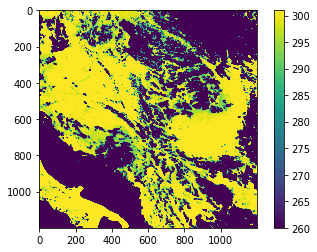

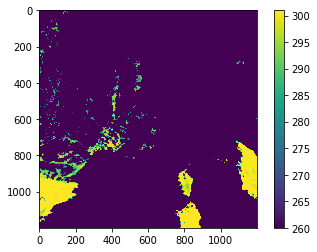

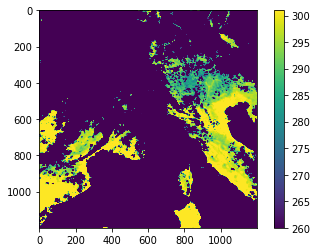

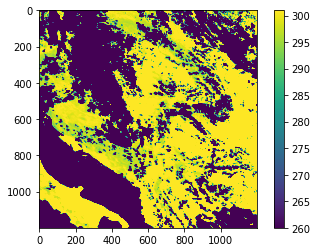

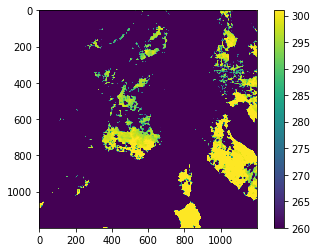

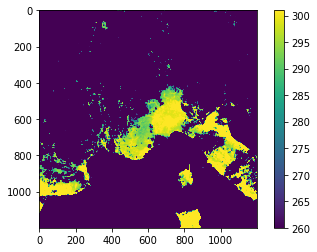

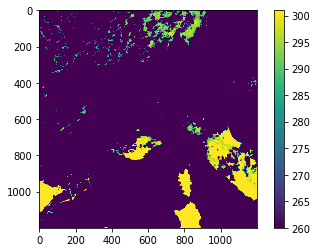

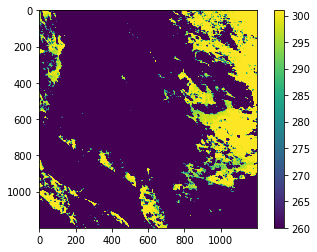

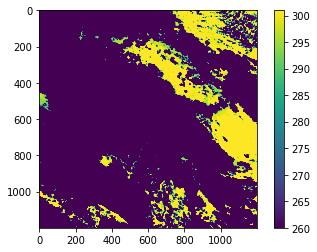

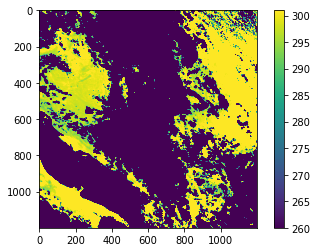

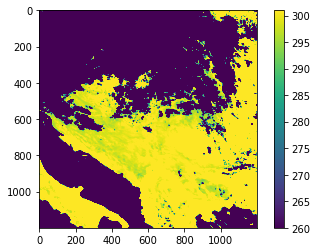

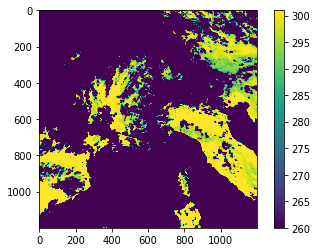

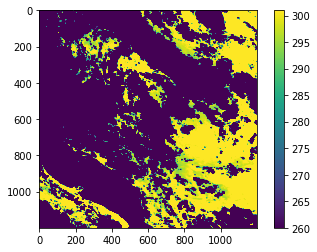

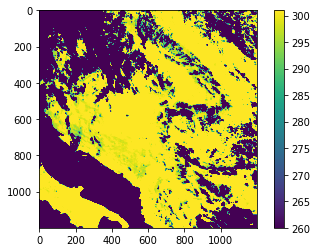

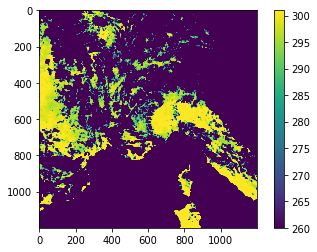

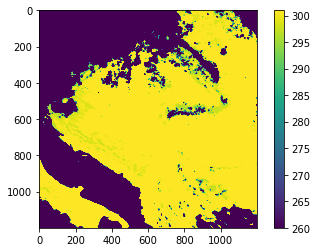

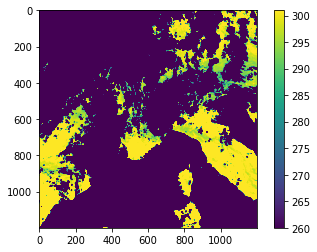

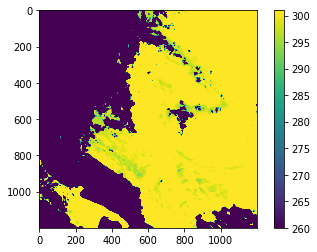

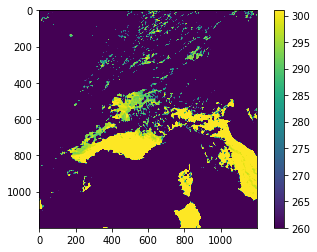

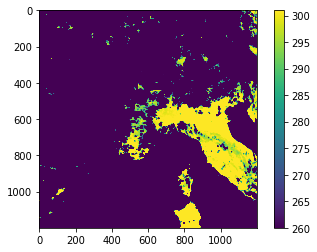

In [10]:

imgs = os.listdir(imgs_1km_Day_path)

for img in imgs:
# if 1:
  # img = imgs[0]
  # Load Day npy file
  npy_path = os.path.join(imgs_1km_Day_path,img)
  LST_K_day = np.load(npy_path)

  plt.figure()
  plt.imshow(LST_K_day)
  plt.clim(260,301)
  plt.colorbar()